## Setup

In [ ]:
!pip install --quiet git+https://github.com/songlab-cal/gpn.git

In [ ]:
import gpn.mlm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import torch
from transformers import AutoModel, AutoModelForMaskedLM, AutoTokenizer

In [ ]:
model_path = "gonzalobenegas/gpn-arabidopsis"

Example region: Chr5:3566900-3567600

[UCSC Genome Browser view](http://ucsc.gao-lab.org/cgi-bin/hgTracks?db=tair10&lastVirtModeType=default&lastVirtModeExtraState=&virtModeType=default&virtMode=0&nonVirtPosition=&position=Chr5%3A3566900%2D3567600&hgsid=168371_2GqAevCqfiJ56NDL5fdLqTbAtbay)

In [ ]:
seq = "CGGGTTAAAAATCTAGTTGTTATTATTAAAGGAAATAAAATATCCTCATAAAACAATTTGTTGTAATCTATCTTTGGGCTAATGTTCTTATCCTACAAGACGAACCCTGACCGTATTCGTCGTAGAAAAAAAATTGCTTCGATCCCATCATTGAGTTCAATAATCGGCGCACAAAGGCCGATTCATAAAAACTCTAGGCCCATTAAAGTAAAGCCCATTCTCAACCCTATCCAGTCTCCCTGTATATATATATTTACGACACCAACCCAGCGTTGATATTTAATTTTCTTCAGTCAGAGATTTCGAAACCCTAGTCGATTTCGAGATCCAACTAACTCTGCTCCTTATCTCAGGTAAAATTCTCGCTCGAGAACTCAATTGCTTATCCAAAGTTCCAACTGAAGATGCTTTCCTACTGAATCTTAGGTTAATGTTTTGGATTTGGAATCTTACCCGAAATTTCTCTGCAGCTTGTTGAATTTGCGAAGTATGGGAGACGCTAGAGACAACGAAGCCTACGAGGAGGAGCTCTTGGACTATGAAGAAGAAGACGAGAAGGTCCCAGATTCTGGAAACAAAGTTAACGGCGAAGCTGTGAAAAAGTGAGTTTTATGGTTTCCTCGATATGTTTCATGTATACTACTGTGTGTTTAAATTTGTCGATTCTTAGATTACTACTTGATAACAAGTAGCAGTATGT"
len(seq)

700

## Tokenization

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(model_path)
tokenizer.get_vocab()

{'a': 2, 'g': 4, 't': 5, '[MASK]': 0, 'c': 3, '[PAD]': 1}

In [ ]:
input_ids = tokenizer(seq, return_tensors="pt", return_attention_mask=False, return_token_type_ids=False)["input_ids"]
print(input_ids.shape)
input_ids[0, :10]

torch.Size([1, 700])


tensor([3, 4, 4, 4, 5, 5, 2, 2, 2, 2])

## Embedding

In [ ]:
model = AutoModel.from_pretrained(model_path)

Some weights of the model checkpoint at gonzalobenegas/gpn-arabidopsis were not used when initializing ConvNetModel: ['cls.decoder.3.bias', 'cls.decoder.0.bias', 'cls.decoder.2.weight', 'cls.decoder.0.weight', 'cls.decoder.2.bias', 'cls.decoder.3.weight']
- This IS expected if you are initializing ConvNetModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ConvNetModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
with torch.no_grad():
    embedding = model(input_ids=input_ids).last_hidden_state
embedding.shape

torch.Size([1, 700, 512])

In [ ]:
# Let's do a quick visualization. We'll standardize the embeddings.

In [ ]:
embedding_df = pd.DataFrame(StandardScaler().fit_transform(embedding[0].numpy()))
embedding_df.index.name = "Position"
embedding_df.columns.name = "Embedding dimension"
embedding_df

Embedding dimension,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
Position,,,,,,,,,,,,,,,,,,,,,
0,-1.835589,-1.541906,-0.238540,-1.693257,2.109571,-0.737567,0.011309,-0.885543,-1.201540,0.355980,...,-1.678981,-0.683935,-0.990211,-0.740792,0.086302,2.120030,-0.326726,0.013270,0.376876,-2.192545
1,0.502391,-0.413908,-1.651947,0.665901,1.805946,-1.143563,1.566530,-0.604032,1.715511,0.688255,...,0.052591,0.613968,0.924555,-0.670096,-1.152319,-0.437756,-1.348986,-1.095817,0.791874,-1.106606
2,0.174562,0.290889,-1.462017,-0.044247,7.850873,-0.629227,-1.583409,-1.343719,0.631091,-0.711367,...,0.071233,2.153192,1.075355,-0.855834,1.819157,-0.540154,1.928948,-1.257257,-0.044258,0.005488
3,0.845877,2.528124,-1.166453,0.449965,2.137016,-1.778234,1.579287,1.056455,2.196359,1.176794,...,1.364694,-0.056384,-1.739925,-0.463984,-1.586329,-0.513797,0.120274,-0.094355,3.293193,-0.155780
4,0.678362,-0.356862,-0.751412,1.898579,3.406994,0.821937,-0.175458,0.880360,-0.547201,-0.179412,...,-0.624502,2.052833,-0.260928,-0.331720,0.768432,-0.469594,0.576744,-0.594854,-0.824445,-1.026141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,-0.158464,0.288363,-0.682777,-0.299099,-0.416011,-0.256051,-0.628428,0.367043,-0.453733,-0.409429,...,-0.766661,0.733319,0.520051,-0.687606,0.002666,-0.498097,1.334327,1.353250,0.423358,-0.195218
696,-0.361003,-0.118864,0.976168,0.881882,0.201672,0.697162,-1.200054,0.816163,-0.804861,-0.241004,...,-0.057523,-0.531214,-1.224920,0.836705,-1.121337,-0.527719,-0.912433,-1.079708,-0.815928,-0.663119
697,-0.740464,0.261594,-0.028741,1.123035,1.093491,0.299930,-0.637927,-0.545146,-0.086055,-0.327027,...,-0.706142,-0.146340,3.845963,-0.584979,0.024109,-0.502199,1.133359,-0.831394,0.327395,-0.383624


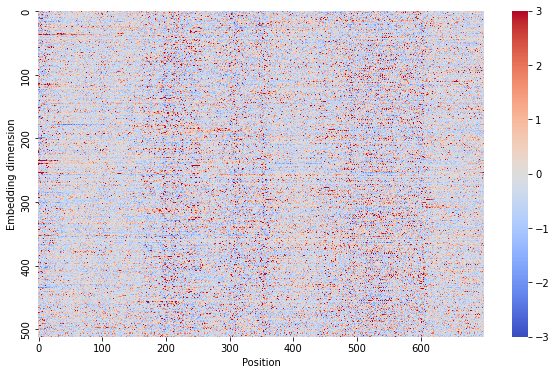

In [ ]:
# If you squint you can see the exon locations :)
plt.figure(figsize=(10, 6))
sns.heatmap(embedding_df.T, center=0, vmin=-3, vmax=3, cmap="coolwarm", square=True, xticklabels=100, yticklabels=100);

## Masked language modeling

In [ ]:
model_for_mlm = AutoModelForMaskedLM.from_pretrained(model_path)

In [ ]:
seq[489:492]  # Start codon

'ATG'

In [ ]:
pos = 489  # Let's mask the A and check the model predictions
input_ids[0, pos] = tokenizer.mask_token_id

In [ ]:
input_ids
with torch.no_grad():
    all_logits = model_for_mlm(input_ids=input_ids).logits
all_logits.shape

torch.Size([1, 700, 6])

In [ ]:
nucleotides = list('acgt')
logits = all_logits[0, pos, [tokenizer.get_vocab()[nc] for nc in nucleotides]]
logits

tensor([ 2.1082, -1.1158, -0.4431, -0.1633])

In [ ]:
probs = torch.nn.functional.softmax(logits, dim=0).numpy()
probs

array([0.8190387 , 0.03259635, 0.06386897, 0.08449608], dtype=float32)

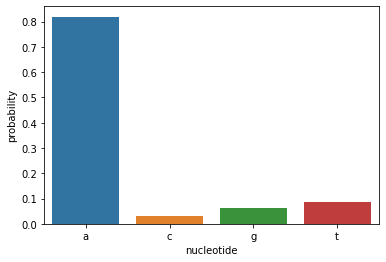

In [ ]:
probs_df = pd.DataFrame(dict(nucleotide=nucleotides, probability=probs))
sns.barplot(data=probs_df, x="nucleotide", y="probability")